# Rice_Prediction_CNN_LeakyReLU

## Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import splitfolders

## Split_Folder

In [18]:
input_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Rice_Image_Dataset'
output_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img'

In [19]:
#splitfolders.fixed(input=input_dir,output=output_dir,fixed=(500,100,100),seed=1337)

## Data Preparation

In [20]:
dataGen=ImageDataGenerator(rescale=1/255)

In [21]:
train_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\train'
test_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\test'
val_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\val'

In [22]:
train_itt=dataGen.flow_from_directory(directory=train_dir,batch_size=64,target_size=(100,100))
test_itt=dataGen.flow_from_directory(directory=test_dir,batch_size=64,target_size=(100,100))
val_itt=dataGen.flow_from_directory(directory=val_dir,batch_size=64,target_size=(100,100))

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


## Model

In [23]:
model=Sequential()

In [24]:
model.add(Conv2D(32,(3,3),activation=LeakyReLU(alpha=0.3),input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation=LeakyReLU(alpha=0.3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.3)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation=LeakyReLU(alpha=0.3)))
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
early_stop= EarlyStopping(monitor='val_loss',patience=3,mode='min',verbose=False)

In [26]:
model.fit(train_itt,validation_data=val_itt,epochs=50,callbacks=early_stop)

Epoch 1/50
40/40 [==============================] - 42s 1s/step - loss: 0.4932 - accuracy: 0.8228 - val_loss: 0.2463 - val_accuracy: 0.9060
Epoch 2/50
40/40 [==============================] - 41s 1s/step - loss: 0.1464 - accuracy: 0.9536 - val_loss: 0.1187 - val_accuracy: 0.9440
Epoch 3/50
40/40 [==============================] - 38s 958ms/step - loss: 0.1374 - accuracy: 0.9524 - val_loss: 0.1318 - val_accuracy: 0.9480
Epoch 4/50
40/40 [==============================] - 38s 961ms/step - loss: 0.0815 - accuracy: 0.9752 - val_loss: 0.1008 - val_accuracy: 0.9640
Epoch 5/50
40/40 [==============================] - 39s 969ms/step - loss: 0.0847 - accuracy: 0.9692 - val_loss: 0.1605 - val_accuracy: 0.9420
Epoch 6/50
40/40 [==============================] - 39s 974ms/step - loss: 0.0655 - accuracy: 0.9764 - val_loss: 0.0921 - val_accuracy: 0.9720
Epoch 7/50
40/40 [==============================] - 38s 961ms/step - loss: 0.0480 - accuracy: 0.9840 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch

<AxesSubplot:>

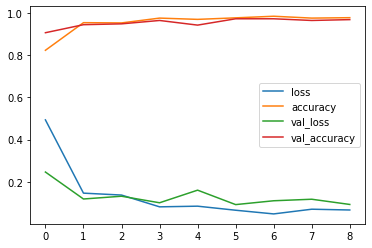

In [27]:
losses = pd.DataFrame(model.history.history)
losses.plot()

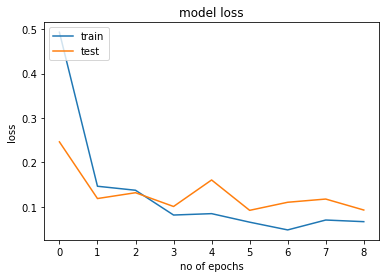

In [28]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

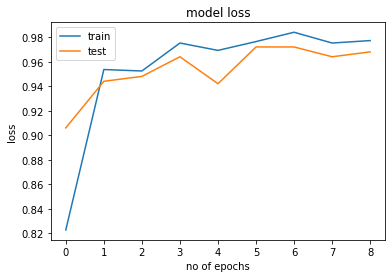

In [29]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [30]:
model.save('weather_classification_model.h5')

In [31]:
class_label= test_itt.class_indices
class_label

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}